<a href="https://colab.research.google.com/github/oluwasunday/Hamoye2020/blob/master/Copy_of_Fuel_ferc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisation
# import seaborn as sns #visualisation

# %matplotlib inline

In [ ]:
data = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(data)

In [ ]:
fuel_data.to_csv('fuel_data_copy.csv', index=False) # creating a copy of the data

In [ ]:
df = pd.read_csv('fuel_data_copy.csv')

In [ ]:
#checking the basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [ ]:
#checking the shape of the data
df.shape

(29523, 11)

In [ ]:
# To display the top 5 rows
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [ ]:
# To display the bottom 5 rows
df.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [ ]:
# Checking the data type
df.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [ ]:
# checking statistical data on numerial data
df.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2014_12_120_1_9,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [ ]:
# check all column names
df.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

###### there is no irrelevant column, so no need to drop column(s)

In [ ]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


### removing duplicate rows

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(29523, 11)

###### check unique values

In [ ]:
df.nunique()

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11227
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12605
dtype: int64

In [ ]:
df['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [ ]:
df['fuel_unit'].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

## grouping
##### quantity of fuel per year

In [ ]:
qty_fuel_pyr = df.groupby('report_year')[['fuel_qty_burned']].count()
qty_fuel_pyr

,fuel_qty_burned
report_year,
1994,1235
1995,1201
1996,1088
1997,1094
1998,1107
1999,1050
2000,1373
2001,1356
2002,1205


#### quantity of fuel by type

In [ ]:
qty_fuel_ptp = df.groupby('fuel_type_code_pudl')[['fuel_qty_burned']].count()
qty_fuel_ptp

,fuel_qty_burned
fuel_type_code_pudl,
coal,8547
gas,11486
nuclear,818
oil,8064
other,167
waste,441


#### quantity of fuel by unit

In [ ]:
qty_fuel_burned_by_unit = df.groupby('fuel_unit')[['fuel_qty_burned']].count()
qty_fuel_burned_by_unit

,fuel_qty_burned
fuel_unit,
bbl,7998
gal,84
gramsU,464
kgU,110
mcf,11354
mmbtu,180
mwdth,95
mwhth,100
ton,8958


#### Quantity of fuel burned by top ten plants

In [ ]:
qty_fuel_burned_top10_by_plant = df.groupby('plant_name_ferc1')[['fuel_qty_burned']].count().sort_values(by='fuel_qty_burned', ascending=False).head(10)
qty_fuel_burned_top10_by_plant

,fuel_qty_burned
plant_name_ferc1,
big stone,156
four corners,151
riverside,133
coyote,121
louisa,119
hayden,99
lake road,93
ben french station,93
independence,91


### years with highest amount of fuel burned

In [ ]:
highest_fuel_burn_per_yr = df.groupby('report_year')[['fuel_qty_burned']].count().sort_values(by='fuel_qty_burned', ascending=False)
highest_fuel_burn_per_yr.head(10)

,fuel_qty_burned
report_year,
2000,1373
2001,1356
2005,1269
2007,1264
2010,1261
2006,1243
2012,1243
2011,1240
1994,1235


### total fuel cost per unit delivered for different fuel type code with respect to each report year

In [ ]:
total_fuel_cost_pudl = df.groupby('fuel_type_code_pudl')[['report_year']].count()
total_fuel_cost_pudl

,report_year
fuel_type_code_pudl,
coal,8547
gas,11486
nuclear,818
oil,8064
other,167
waste,441


In [ ]:
#group by the fuel type code year and print the first entries in all the groups formed
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [ ]:
# import seaborn as sns

# Cleaning Data / Data Wrangling

In [ ]:
# sorting dataset in descending order
df.sort_values(by = "record_id", ascending=False)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
28986,f1_fuel_2018_12_99_1_4,99,2018,sweatt ct,gas,mcf,75192.0,1.000000,5.326,0.000,5.128
28988,f1_fuel_2018_12_99_1_13,99,2018,ratcliffe,gas,mcf,25990722.0,1.000000,3.167,0.000,3.029
28987,f1_fuel_2018_12_99_1_10,99,2018,daniel cc,gas,mcf,57638147.0,1.000000,3.595,0.000,3.534
28983,f1_fuel_2018_12_99_0_7,99,2018,watson,gas,mcf,15336577.0,1.000000,3.597,0.000,3.523
28982,f1_fuel_2018_12_99_0_2,99,2018,daniel,coal,ton,725532.0,18.000000,56.745,0.000,3.080
...,...,...,...,...,...,...,...,...,...,...,...
926,f1_fuel_1994_12_100_0_3,100,1994,independence,oil,bbl,15419.0,5.696880,48.745,48.745,8.557
930,f1_fuel_1994_12_100_0_15,100,1994,baxter wilson,oil,bbl,54320.0,6.344142,80.245,80.245,12.649
929,f1_fuel_1994_12_100_0_14,100,1994,baxter wilson,gas,mcf,25910162.0,1.048499,2.090,2.090,1.993
928,f1_fuel_1994_12_100_0_11,100,1994,delta,gas,mcf,3729158.0,1.078320,1.994,1.994,1.849


### Merging

In [ ]:
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)

#check that the length of both dataframes sum to the expected length
assert len(fuel_data) == (len(fuel_df1) + len(fuel_df2))

In [ ]:
#an inner merge will lose rows that do not match in both dataframes
pd.merge(fuel_df1, fuel_df2, how="inner")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [ ]:
#outer merge returns all rows in both dataframes
pd.merge(fuel_df1, fuel_df2, how="outer")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [ ]:
#removes rows from the right dataframe that do not have a match with the left
#and keeps all rows from the left

pd.merge(fuel_df1, fuel_df2, how="left")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
18995,f1_fuel_2009_12_182_1_9,182,2009,lake road,gas,mcf,340857.0,1.000000,4.711,4.711,4.711
18996,f1_fuel_2009_12_182_1_10,182,2009,lake road,oil,NaN,771.0,5.801544,84.899,84.899,14.634
18997,f1_fuel_2009_12_182_1_13,182,2009,iatan (18%),coal,ton,414142.0,16.718000,18.509,17.570,1.107
18998,f1_fuel_2009_12_182_1_14,182,2009,iatan (18%),oil,bbl,5761.0,5.537910,83.636,72.280,15.102


### Checking for duplicates

In [ ]:
# number of NaN/Null values
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
# Replacing the missing values with "mcf".
df_replace_null = df.fillna('mcf')

In [ ]:
#confirm null values been filled
df_replace_null.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [ ]:
df_replace_null.duplicated().any() # checks for duplicate rows again

False

# Relationship Analysis

#### Scatter diagram

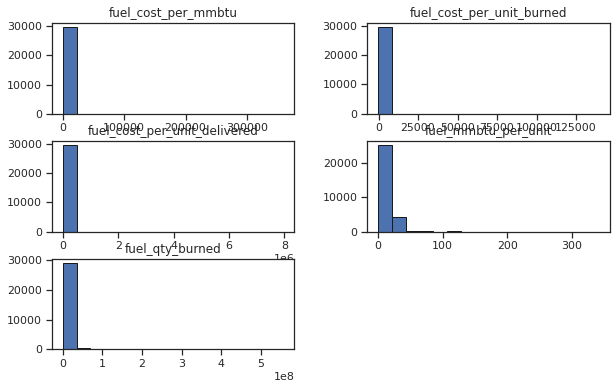

In [ ]:
df_replace_null[['fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']].hist(figsize=(10,6), bins=16, linewidth=1, edgecolor='k', grid=False)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


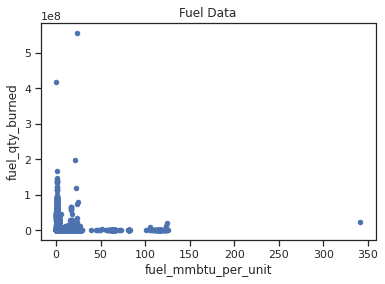

In [ ]:
df_replace_null.plot(kind='scatter', x='fuel_mmbtu_per_unit', y='fuel_qty_burned', title='Fuel Data');

In [ ]:
import seaborn as sns

In [ ]:
corelation = df_replace_null.corr()
corelation

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


### **HEATMAP**

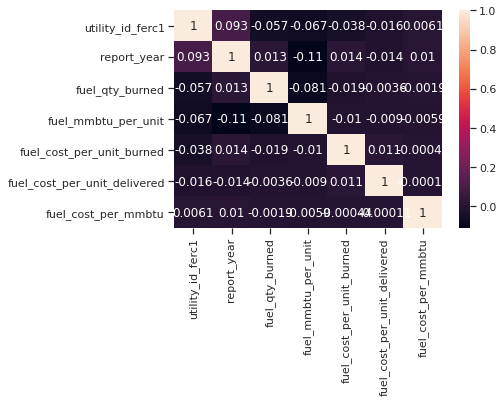

In [ ]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

### **PAIRPLOT**

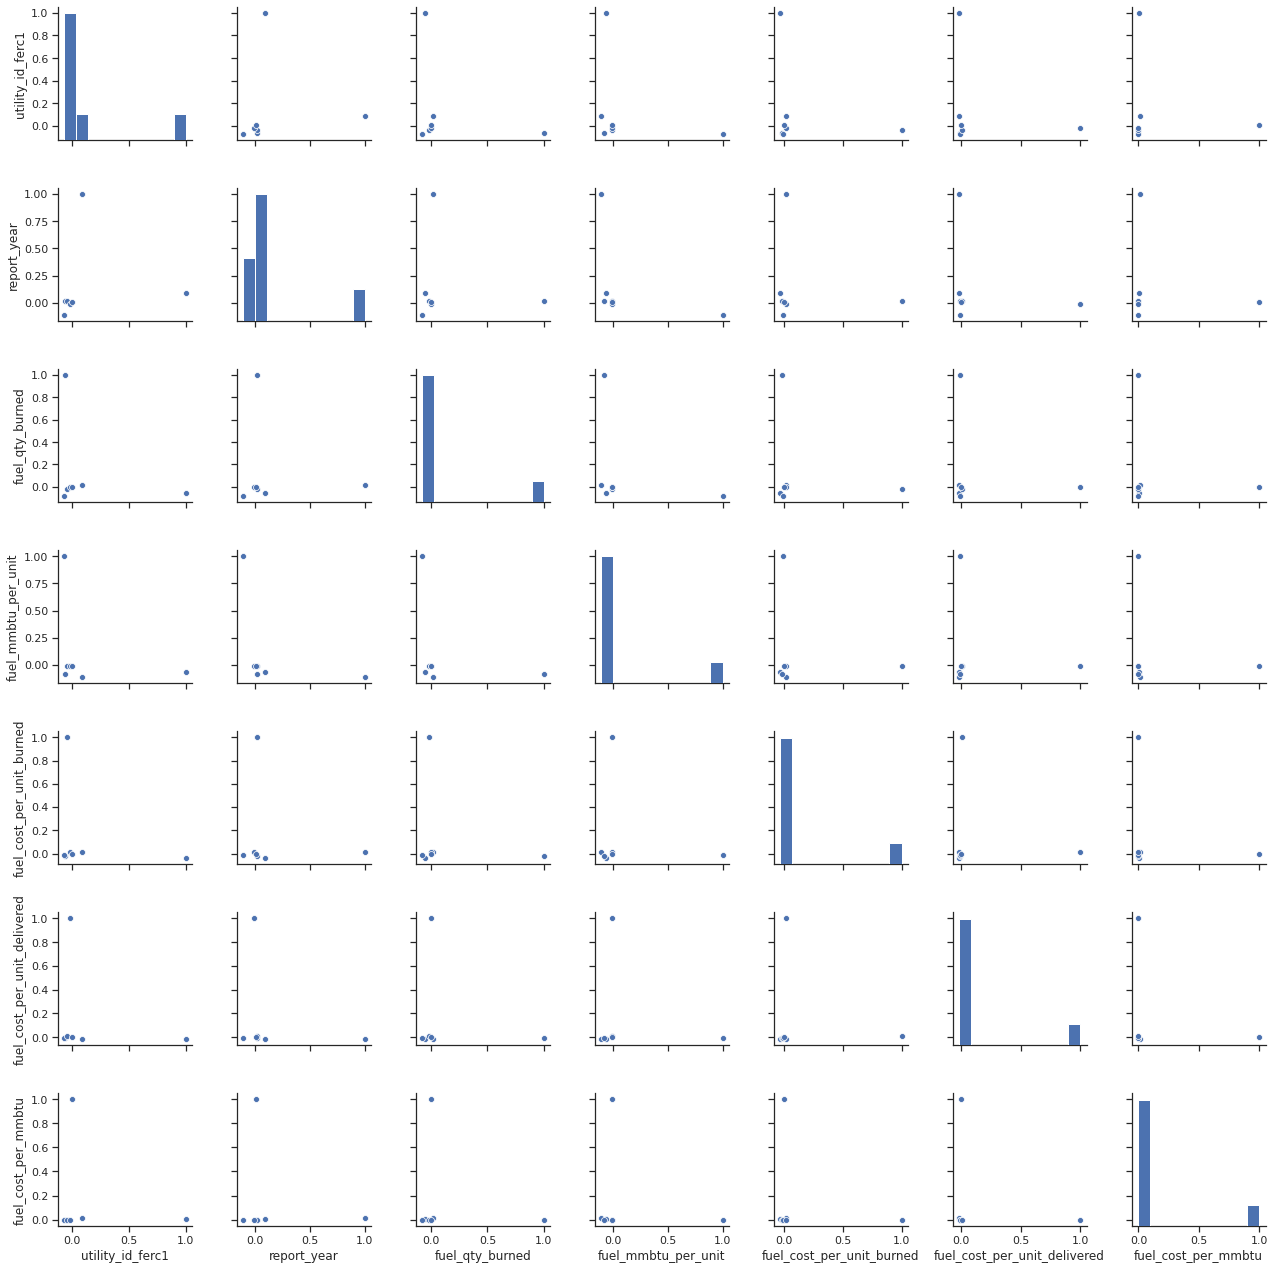

In [ ]:
sns.pairplot(corelation)

### **USING BARCHART**

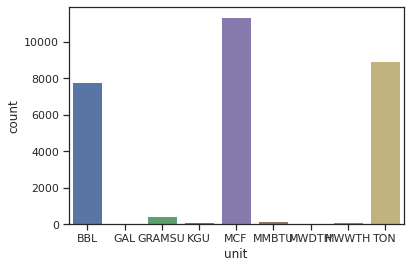

In [ ]:
fuel_unit = pd.DataFrame({'unit': ['BBL', 'GAL','GRAMSU', 'KGU','MCF','MMBTU','MWDTH', 'MWWTH', 'TON'],

'count': [7798, 84, 464, 110, 11345, 180, 95, 100, 8958]})

sns.barplot(data=fuel_unit, x='unit', y='count')

In [ ]:
qty_fuel_code_pudl = df.groupby('fuel_type_code_pudl')['fuel_qty_burned'].count()#[['fuel_qty_burned']].count()
qty_fuel_code_pudl

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_qty_burned, dtype: int64

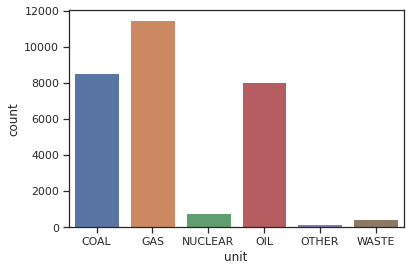

In [ ]:
fuel_unit = pd.DataFrame({'unit': ['COAL', 'GAS','NUCLEAR', 'OIL','OTHER','WASTE'],

'count': qty_fuel_code_pudl})

sns.barplot(data=fuel_unit, x='unit', y='count')

### **USING REGPLOT PLOT**

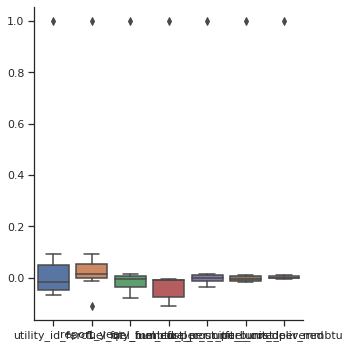

In [ ]:
# sns.catplot(x=['record_id'], kind='box', data=corelation)
sns.catplot(kind='box', data=corelation)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


([<matplotlib.patches.Wedge at 0x7f0cfc98e6d8>,
 [Text(0.7250878563033353, 0.8271926019020203, ''),
  Text(-0.15382838563042403, 1.0891909051099984, ''),
  Text(-0.21704558120235415, 1.0783743393091902, ''),
  Text(-0.2824673278061826, 1.0631143911743621, ''),
  Text(-1.0971468130625681, 0.07917619962242656, ''),
  Text(-0.42463926536499463, -1.014732227885898, ''),
  Text(-0.3947673691506401, -1.0267223209095448, ''),
  Text(-0.37337913538481016, -1.0346922350434895, ''),
  Text(0.63695268642047, -0.8968228784223486, '')])

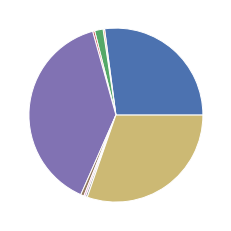

In [ ]:
qty_fuel_pyr = df_replace_null.groupby('fuel_unit')[['fuel_qty_burned']].count().head(10)#[['fuel_qty_burned']].count()
qty_fuel_py = df['fuel_unit'].unique()
#ft = df['fuel_qty_burned'].head(10)

cc = [23,44,66,55,44,55,67,67,54]
lbl = ['qty','_fu','el','_py','de','tr','ght','gg','ytt']
# plt.pie(cc, labels=lbl)
# plt.pie(qty_fuel_pyr, labels=qty_fuel_py)
plt.pie(qty_fuel_pyr)
# qty_fuel_pyr
# qty_fuel_py